# Importing Necessary Libraries

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Loading

In [27]:
data = pd.read_csv("diabetes_012_health_indicators_BRFSS2021.csv")


# Data Exploring


In [28]:
data.shape


(236378, 22)

In [29]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0,1,1,15,1,0,0,0,1,...,1,0,5,10,20,0,0,11,4,5
1,2,1,0,1,28,0,0,1,0,1,...,1,0,2,0,0,0,0,11,4,3
2,2,1,1,1,33,0,0,0,1,1,...,1,0,2,10,0,0,0,9,4,7
3,2,0,1,1,29,0,1,1,1,1,...,1,0,5,0,30,1,1,12,3,4
4,0,0,0,1,24,1,0,0,0,0,...,1,0,3,0,0,1,1,13,5,6


In [30]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,...,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000
mean,0.307791,0.418558,0.402059,0.963347,28.953579,0.411997,0.038900,0.086548,0.779231,0.621259,...,0.962573,0.063737,2.480717,3.937710,3.751297,0.153948,0.477824,7.863930,5.139099,6.927451
std,0.705037,0.493324,0.490315,0.187909,6.552055,0.492196,0.193356,0.281172,0.414766,0.485074,...,0.189807,0.244284,1.029134,7.886506,8.245907,0.360900,0.499509,3.236997,0.946185,2.375450
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,4.000000,2.000000,0.000000,1.000000,10.000000,6.000000,9.000000
max,2.000000,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


# Exploratory Data Analysis

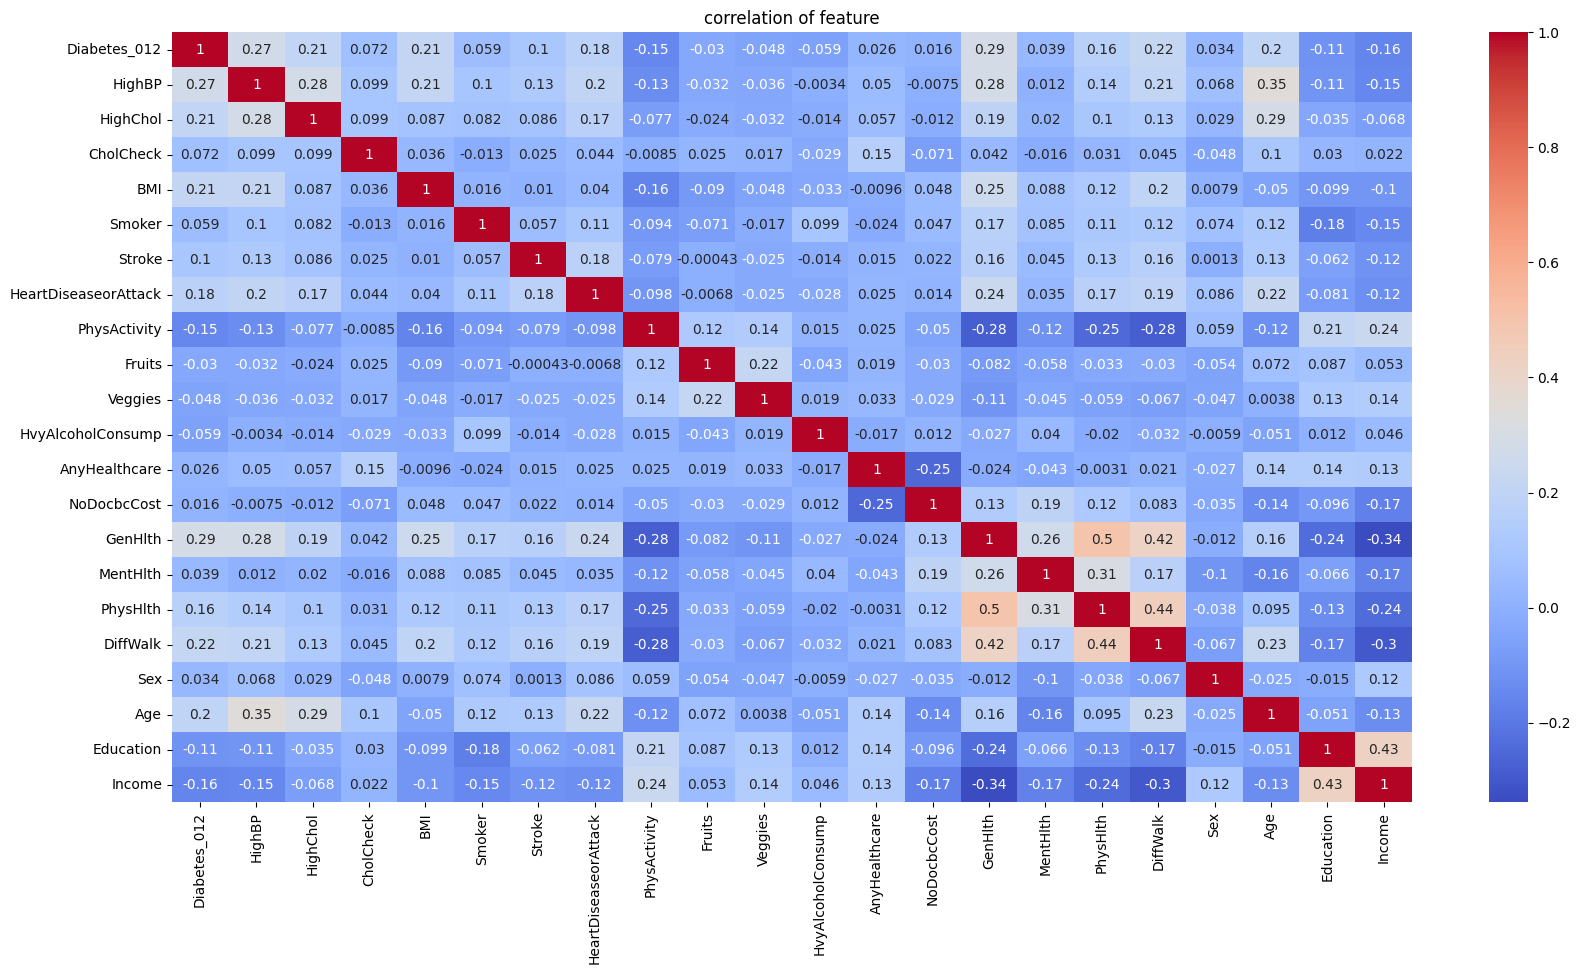

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True ,cmap ='coolwarm' )
plt.title("correlation of feature")
plt.show()

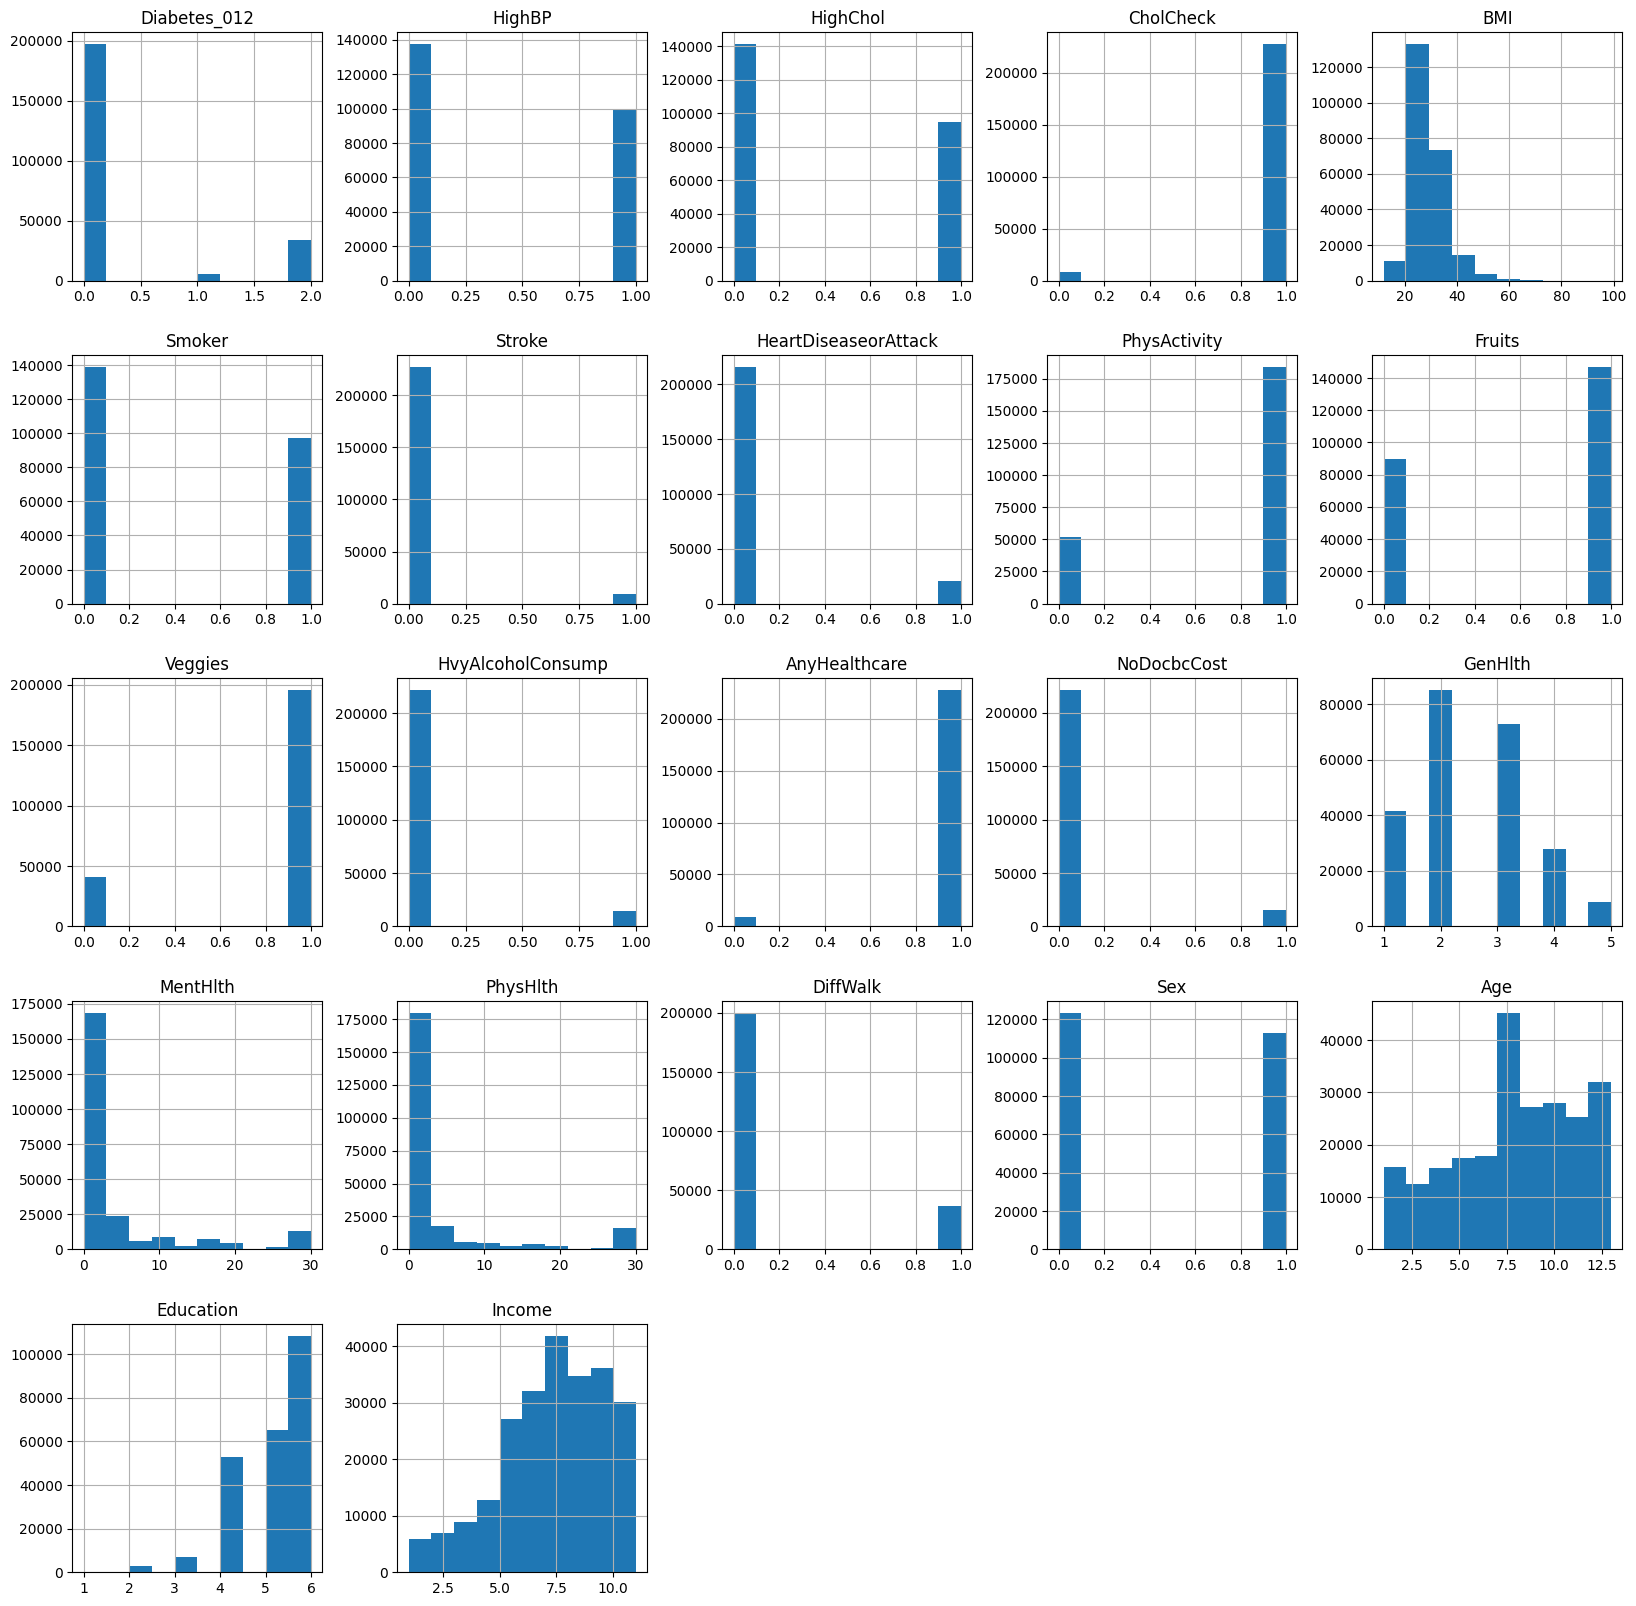

In [32]:
data.hist(figsize=(20,20));

In [33]:
from imblearn.under_sampling import NearMiss

In [34]:
df_features = data.drop("Diabetes_012",axis=1)
df_target = data["Diabetes_012"]
df_target.value_counts()
nm = NearMiss(version = 1 , n_neighbors = 10)
df_features, df_target = nm.fit_resample(df_features, df_target)
df_features.shape , df_target.shape

((16857, 21), (16857,))

# Checking and Droping Duplicate Values

In [35]:
data.duplicated().sum()

12828

In [36]:
data.drop_duplicates(inplace =True)

In [37]:
data.duplicated().sum()

0

# Feature Selection

In [38]:
threshold = 10

In [39]:
from sklearn.feature_selection import mutual_info_classif

In [40]:
high_score_features_mic = []
feature_scores = mutual_info_classif(df_features, df_target, random_state=0)
for score, f_name in sorted(zip(feature_scores, df_features.columns), reverse=True)[:threshold]:
        high_score_features_mic.append(f_name)

print(high_score_features_mic)

['GenHlth', 'Income', 'BMI', 'PhysHlth', 'Age', 'Education', 'MentHlth', 'DiffWalk', 'PhysActivity', 'Fruits']


# Data Splitting

In [42]:
y = df_target

features_list = [
    ["all",df_features],

    ["mic 3", df_features[high_score_features_mic[:3]]],
    ["mic 5", df_features[high_score_features_mic[:5]]],
    ["mic 7", df_features[high_score_features_mic[:7]]],
    ["mic 10", df_features[high_score_features_mic]],

    ["choose 3", df_features[['BMI','Age','HighBP']]],
    ["choose 5", df_features[['BMI','Age','HighBP','Smoker','MentHlth']]],
    ["choose 7", df_features[['BMI','Age','HighBP','Smoker','MentHlth', 'PhysHlth','GenHlth']]],

]

# Data Scalling

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [47]:
scalar = StandardScaler()
data = []

for name, X in features_list:
    data.append([name, scalar.fit_transform(X)])

splited_data = []
for name, X in data:
    X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.3)
    splited_data.append({
            'name': name ,'X_train': X_train,
            'X_test':X_test,'y_train':y_train,
            'y_test':y_test
        })

# Modelling

In [54]:
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
pred_list = []
evaluations = pd.DataFrame()

In [58]:
for data in tqdm(splited_data):
    fs = data["name"]
    models = [
        ['LR', LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='ovr'), data]
    ]

    roc_list = []
    accuracy_list = []
    f1_list = []
    recall_list = []
    precision_list = []

    for name, model, data in tqdm(models):
        X_train, X_test, y_train, y_test = data['X_train'], data['X_test'], data['y_train'], data['y_test']
        model.fit(X_train, y_train)
        y_pred_proba = model.predict_proba(X_test)

        pred_list.append({
            "model": name,
            "fs": fs,
            "data": y_pred_proba
        })

        # Calculate ROC AUC score for multi-class
        roc_list.append(metrics.roc_auc_score(y_test, y_pred_proba, multi_class='ovr'))

        # Convert probabilities to binary predictions for other metrics
        y_pred = model.predict(X_test)

        accuracy_list.append(metrics.accuracy_score(y_test, y_pred))
        f1_list.append(metrics.f1_score(y_test, y_pred, average='weighted'))
        recall_list.append(metrics.recall_score(y_test, y_pred, average='weighted'))
        precision_list.append(metrics.precision_score(y_test, y_pred, average='weighted'))

    names = [name for name, _, _ in models]
    fsm = [data['name'] for _, _, data in models]
    evaluation = pd.DataFrame({
        'classifiers': names,
        'Feature selection method': fsm,
        'AUC Score': roc_list,
        'Accuracy': accuracy_list,
        'Precision': precision_list,
        'Recall': recall_list,
        'F-measure': f1_list
    })

    evaluations = pd.concat([evaluations, evaluation], ignore_index=True)

    evaluation = evaluation.sort_values(by='AUC Score', ascending=False)
    print(evaluation)


 12%|█▎        | 1/8 [00:00<00:03,  1.86it/s]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
0          LR                      all   0.874949  0.727758   0.744255   

     Recall  F-measure  
0  0.727758    0.72949  



 25%|██▌       | 2/8 [00:00<00:01,  3.14it/s]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
0          LR                    mic 3   0.717558  0.542112   0.523193   

     Recall  F-measure  
0  0.542112   0.511846  



 38%|███▊      | 3/8 [00:00<00:01,  3.53it/s]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
0          LR                    mic 5   0.792299  0.645512   0.658805   

     Recall  F-measure  
0  0.645512   0.646541  



 50%|█████     | 4/8 [00:01<00:01,  3.23it/s]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
0          LR                    mic 7   0.841081    0.6983   0.722337   

   Recall  F-measure  
0  0.6983   0.701189  



 62%|██████▎   | 5/8 [00:01<00:01,  2.86it/s]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
0          LR                   mic 10   0.854323  0.700277   0.720684   

     Recall  F-measure  
0  0.700277   0.703618  



 75%|███████▌  | 6/8 [00:02<00:00,  3.03it/s]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
0          LR                 choose 3   0.696025  0.517794    0.52174   

     Recall  F-measure  
0  0.517794   0.518781  



 88%|████████▊ | 7/8 [00:02<00:00,  2.54it/s]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
0          LR                 choose 5   0.772744  0.617635   0.650055   

     Recall  F-measure  
0  0.617635   0.621016  



100%|██████████| 8/8 [00:02<00:00,  2.71it/s]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
0          LR                 choose 7   0.823999  0.672005   0.707313   

     Recall  F-measure  
0  0.672005   0.677255  


In [59]:
evaluations = evaluations.sort_values(by='AUC Score', ascending=False, ignore_index=True)
pd.set_option("display.max_rows", None)
evaluations

,classifiers,Feature selection method,AUC Score,Accuracy,Precision,Recall,F-measure
0,LR,all,0.874949,0.727758,0.744255,0.727758,0.729490
1,LR,mic 10,0.854323,0.700277,0.720684,0.700277,0.703618
2,LR,mic 7,0.841081,0.698300,0.722337,0.698300,0.701189
3,LR,choose 7,0.823999,0.672005,0.707313,0.672005,0.677255
4,LR,mic 5,0.792299,0.645512,0.658805,0.645512,0.646541
5,LR,choose 5,0.772744,0.617635,0.650055,0.617635,0.621016
6,LR,mic 3,0.717558,0.542112,0.523193,0.542112,0.511846
7,LR,choose 3,0.696025,0.517794,0.521740,0.517794,0.518781


In [62]:
X = df_features[high_score_features_mic]
y = df_target
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.3)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr')

In [63]:
y_pred_proba = model.predict_proba(X_test)
score = metrics.roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
score

0.8486236274026616

In [65]:
from mlxtend.plotting import plot_confusion_matrix

Train


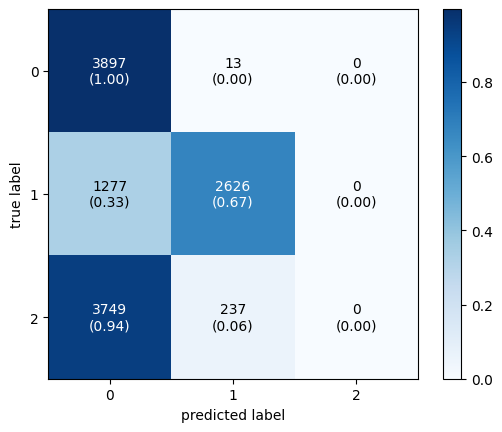

Test


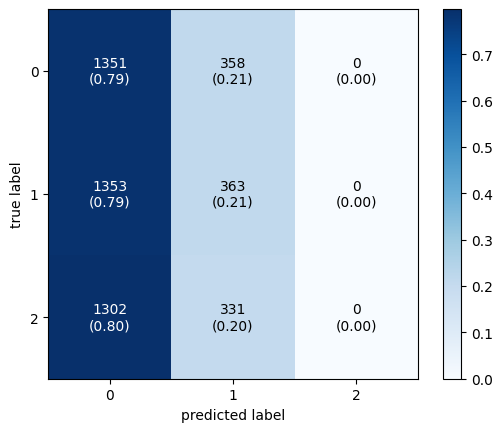

In [67]:
y_pred = [0 if (y<0.5)else 1 for y in y_pred]

print("Train")

y_pred_trean = model.predict_proba(X_train)[:,1]
y_pred_trean = [0 if (y<0.5)else 1 for y in y_pred_trean]

cm1 = confusion_matrix(y_train, y_pred_trean)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                        show_normed=True,
                        colorbar=True)
plt.show()

print("Test")
cm1 = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                        show_normed=True,
                        colorbar=True)
plt.show()
